### Verinin alınması ve orijinal sınıfların gösterimi

Text(0.5,1,'örnek küme')

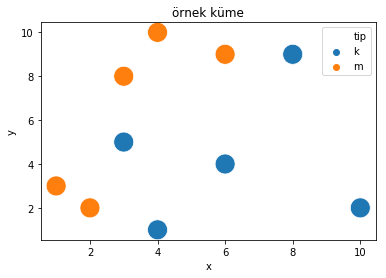

In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel('data.xlsx',sheet_name='Sheet2')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.scatterplot(x="x", y="y", hue="tip", data=data, cmap='coolwarm', s=400).set_title('örnek küme')

### Orijinal veri ve Adaboost algoritmasının tahmini

max_depth ve n_estimators parametrelerini değiştirerek sonucun değişimini görebilirsiniz.

Text(0.5,1,'model tahmini')

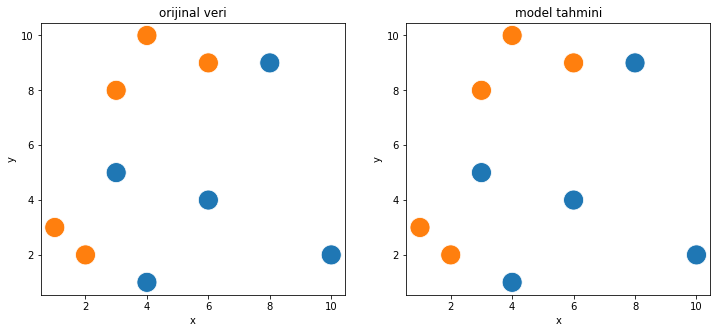

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=3)

x_train = data[['x','y']]
y_train = data['tip']
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

data['pred'] = y_pred

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
sns.scatterplot(x="x", y="y", hue="tip", data=data, cmap='coolwarm',
                s=400, ax=ax[0], legend=False).set_title('orijinal veri')
sns.scatterplot(x="x", y="y", hue="pred", data=data, cmap='coolwarm', s=400,
                ax=ax[1], legend=False).set_title('model tahmini')

### Adaboost algoritmasının bütün olası değerler için tahmini

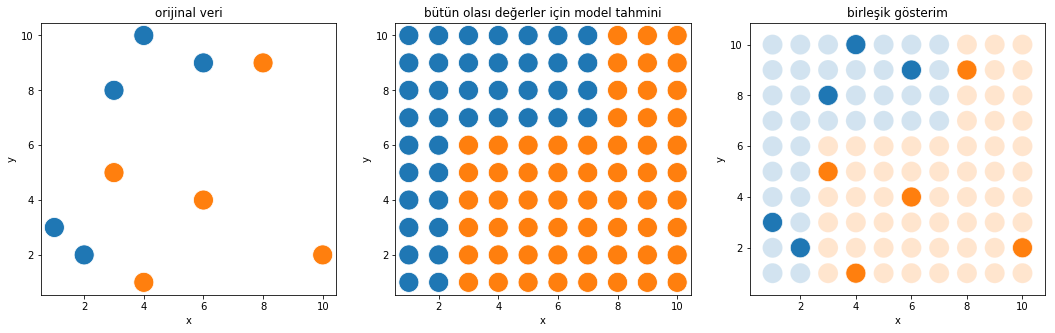

In [3]:
deneme = pd.read_excel('data.xlsx',sheet_name='Sheet3')
y_pred_2 = model.predict(deneme)

deneme['pred_2'] = y_pred_2

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18,5))
sns.scatterplot(x="x", y="y", hue="tip", data=data, hue_order=['m','k'], s=400,
                ax=ax[0], legend=False).set_title('orijinal veri')
sns.scatterplot(x="x", y="y", hue="pred_2", data=deneme, hue_order=['m','k'], s=400,
                ax=ax[1], legend=False).set_title('bütün olası değerler için model tahmini')

sns.scatterplot(x="x", y="y", hue="tip", data=data, hue_order=['m','k'], s=400,
                ax=ax[2], legend=False).set_title('birleşik gösterim')
sns.scatterplot(x="x", y="y", hue="pred_2", data=deneme, hue_order=['m','k'], s=400,
                ax=ax[2], legend=False, alpha=0.2)

### Her iterasyonda tahminlerin değişiminin gösterimi

Text(0.5,1,'bütün olası değerler için model tahmini (3. iterasyon)')

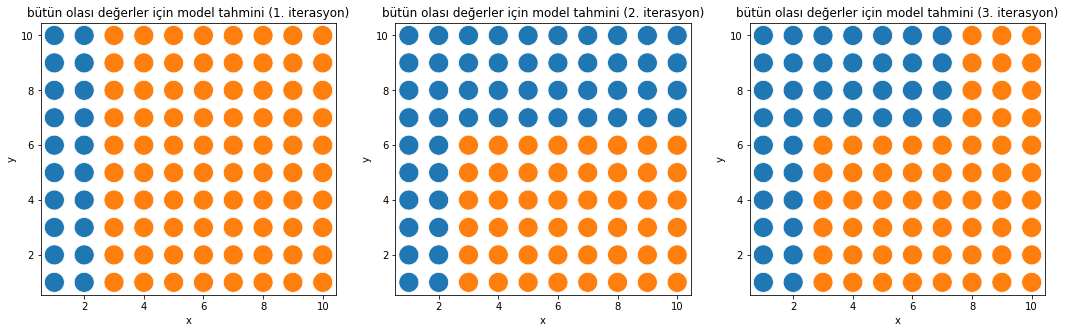

In [115]:
deneme = pd.read_excel('data.xlsx',sheet_name='Sheet3')

#1 iterasyon
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=1)
model.fit(x_train, y_train)
y_pred_2 = model.predict(deneme[['x','y']])
deneme['pred_1'] = y_pred_2

#2 iterasyon
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=2)
model.fit(x_train, y_train)
y_pred_2 = model.predict(deneme[['x','y']])
deneme['pred_2'] = y_pred_2

#3 iterasyon
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=3)
model.fit(x_train, y_train)
y_pred_2 = model.predict(deneme[['x','y']])
deneme['pred_3'] = y_pred_2


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18,5))
sns.scatterplot(x="x", y="y", hue="pred_1", data=deneme, hue_order=['m','k'], s=400,
                ax=ax[0], legend=False).set_title('bütün olası değerler için model tahmini (1. iterasyon)')
sns.scatterplot(x="x", y="y", hue="pred_2", data=deneme, hue_order=['m','k'], s=400,
                ax=ax[1], legend=False).set_title('bütün olası değerler için model tahmini (2. iterasyon)')
sns.scatterplot(x="x", y="y", hue="pred_3", data=deneme, hue_order=['m','k'], s=400,
                ax=ax[2], legend=False).set_title('bütün olası değerler için model tahmini (3. iterasyon)')